# Experiments

In [4]:
import vectorizers
import kernels
import numpy as np
from sklearn import svm
from sklearn import cross_validation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_df(df,figsize=6):
    n_df = df.copy(deep=True)
    for idf in df:
        n_df[idf] =  df[idf].apply(lambda x:float(x.split()[0]))
    plt.figure(figsize=(figsize,figsize))
    ax = plt.gca()
    n_df.plot(kind='bar',ax=ax)    
    plt.grid()
    plt.ylim([0.,1.])
    plt.show()

## loading data

In [25]:
import cPickle as pickle
V_kernels = pickle.load(open('../../data/test/tryvect_kernels.pkl','r'))
y = pickle.load(open('../../data/labels.pkl','r'))
V_kernels = pickle.load(open('../../data/test/tryvect_kernels.pkl','r'))
T = pickle.load(open('../../data/trees_with_labels.pkl'))
pickle.dump(V_kernels,open('../../data/test/vect_kernels.pkl','w'))
V = pickle.load(open('../../data/test/vects.pkl','r'))
svm_df = pickle.load(open('../../data/test/svm_res.pkl','r'))

idx_narr = np.where(y == 0)[0]
idx_other = np.where(y != 0)[0]
idx_narr = np.random.permutation(idx_narr)[:220]
idx = np.concatenate((idx_narr,idx_other))

## loading classifiers

### SVM

In [24]:
Kernels = ['rbf', 'lin', 'cos_sim']
representations = ['bin', 'count', 'tfid', 'norm', 'height']

results = []
for k in Kernels:
    d = {}
    for rep in representations:
        K = V_kernels[k][rep]
        K = K[idx][:,idx]
        svm_clf = svm.SVC(kernel="precomputed")
        scores = cross_validation.cross_val_score(svm_clf,K,y[idx],cv=5)        
        d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
        print rep
        
    results.append(d)
svm_res = pd.DataFrame(results,index=Kernels)
plot_df(svm_res)
plt.show()
svm_res

ValueError: Found arrays with inconsistent numbers of samples: [ 638 1149]

### Added feats tree K

bin
count
tfid
norm
height
bin
count
tfid
norm
height
bin
count
tfid
norm
height


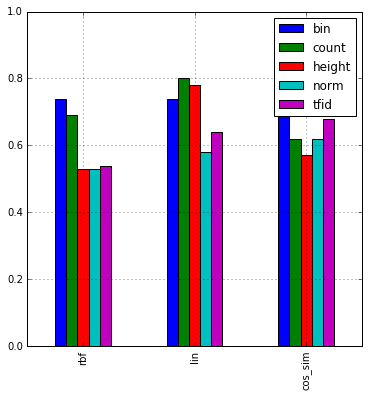

,bin,count,height,norm,tfid
rbf,0.74 (+/- 0.04),0.69 (+/- 0.04),0.53 (+/- 0.07),0.53 (+/- 0.06),0.54 (+/- 0.07)
lin,0.74 (+/- 0.07),0.80 (+/- 0.05),0.78 (+/- 0.05),0.58 (+/- 0.04),0.64 (+/- 0.03)
cos_sim,0.72 (+/- 0.02),0.62 (+/- 0.05),0.57 (+/- 0.06),0.62 (+/- 0.05),0.68 (+/- 0.03)


In [124]:
Kernels = ['rbf', 'lin', 'cos_sim']
representations = ['bin', 'count', 'tfid', 'norm', 'height']

results = []
for k in Kernels:
    d = {}
    for rep in representations:
        K = V_kernels[k][rep]
        K = K[idx][:,idx]+0.0001*K_t5[idx][:,idx]
        svm_clf = svm.SVC(kernel="precomputed")
        scores = cross_validation.cross_val_score(svm_clf,K,y[idx],cv=5)        
        d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
        print rep
        
    results.append(d)
svm_res = pd.DataFrame(results,index=Kernels)
plot_df(svm_res)
plt.show()
svm_res

### Introspection du modèle

In [32]:
D = pickle.load(open('../../data/test/dicts.pkl','r'))

In [33]:
svm_lin_clf = svm.SVC(kernel='linear')
svm_lin_clf.fit(V['count'],y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
from sklearn import feature_extraction

vectorizer = feature_extraction.DictVectorizer(sparse=False)
V_bin = vectorizer.fit_transform(D['bin'])


w0 = svm_lin_clf.coef_[0].argsort()
pos0 = np.array(w0[-5:])

w1 = svm_lin_clf.coef_[1].argsort()
pos1 = np.array(w1[-5:])

w2 = svm_lin_clf.coef_[2].argsort()
pos2 = np.array(w2[-5:])

test0 = np.zeros((len(w0)))
test1 = np.zeros((len(w1)))
test2 = np.zeros((len(w2)))

test0[pos0] = 1
test1[pos1] = 1
test2[pos2] = 1

print vectorizer.inverse_transform(test0)
print ''
print vectorizer.inverse_transform(test1)
print ''
print vectorizer.inverse_transform(test2)

[{'NN-temporal': 1.0, 'NS-concession': 1.0, 'NS-temporal': 1.0, 'NS-example': 1.0, 'NS-antithesis': 1.0}]

[{'SN-attribution': 1.0, 'NS-temporal': 1.0, 'NN-sequence': 1.0, 'NN-list': 1.0, 'SN-antithesis': 1.0}]

[{'SN-condition': 1.0, 'NS-condition': 1.0, 'NS-temporal': 1.0, 'NS-manner': 1.0, 'NN-list': 1.0}]


/home/emmanuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/emmanuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/emmanuel/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a singl

### Random Forest

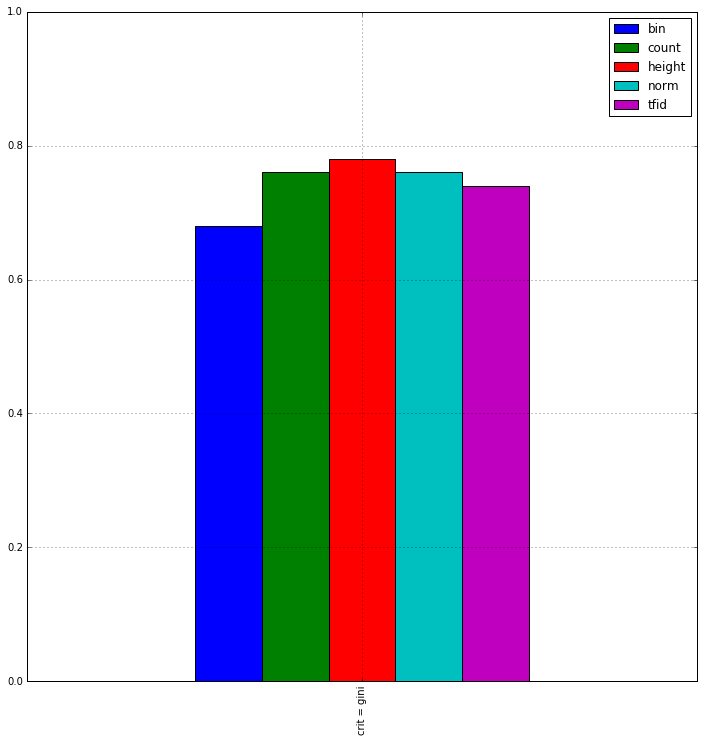

bye


,bin,count,height,norm,tfid
crit = gini,0.68 (+/- 0.04),0.76 (+/- 0.08),0.78 (+/- 0.08),0.76 (+/- 0.06),0.74 (+/- 0.02)


In [96]:
from sklearn import ensemble
results = []
d = {}
for rep in representations:
    rand_forest = ensemble.RandomForestClassifier()
    scores = cross_validation.cross_val_score(rand_forest,V[rep][idx],y[idx],cv=5)        
    d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
results.append(d)
rand_forest_res = pd.DataFrame(results,index=['crit = gini'])
plot_df(rand_forest_res,figsize=12)

print 'bye'
rand_forest_res

### KNN

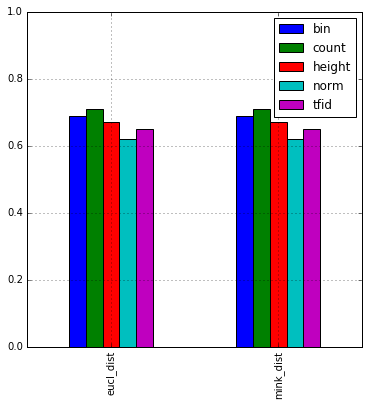

hey


,bin,count,height,norm,tfid
eucl_dist,0.69 (+/- 0.13),0.71 (+/- 0.06),0.67 (+/- 0.03),0.62 (+/- 0.07),0.65 (+/- 0.06)
mink_dist,0.69 (+/- 0.13),0.71 (+/- 0.06),0.67 (+/- 0.03),0.62 (+/- 0.07),0.65 (+/- 0.06)


In [98]:
from sklearn import neighbors
metrics = ['eucl_dist','mink_dist']
representations = ['bin', 'count', 'tfid', 'norm', 'height']

results = []
for k in metrics:
    d = {}
    for rep in representations:
        K = V_kernels[k][rep]
        K = K[idx][:,idx]
        knn_clf = neighbors.KNeighborsClassifier(metric="precomputed")
        scores = cross_validation.cross_val_score(knn_clf,K,y[idx],cv=5)        
        d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
    results.append(d)
    
knn_res = pd.DataFrame(results,index=metrics)
plot_df(knn_res)
print 'hey'
knn_res

### MaxEnt

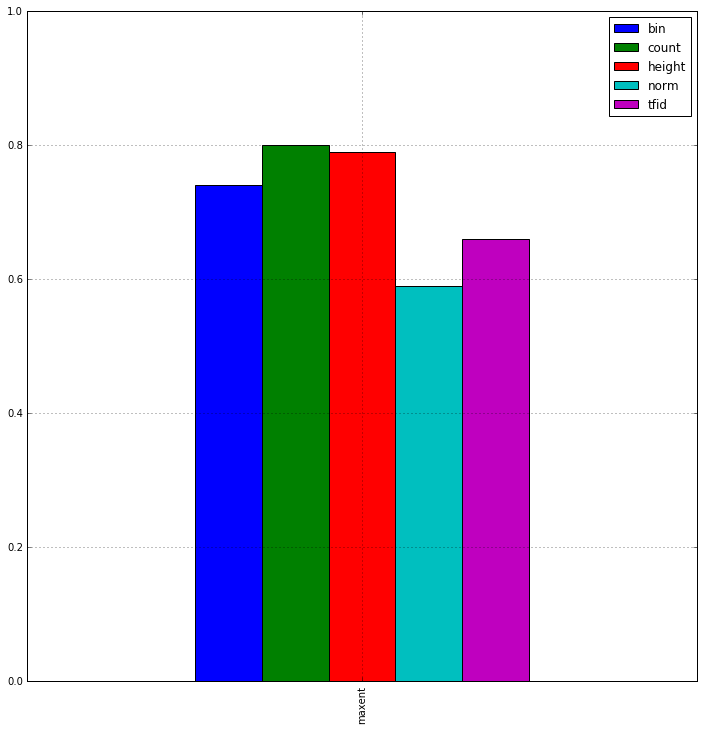

bonj


,bin,count,height,norm,tfid
maxent,0.74 (+/- 0.07),0.80 (+/- 0.06),0.79 (+/- 0.06),0.59 (+/- 0.05),0.66 (+/- 0.07)


In [118]:
from sklearn import linear_model

results = []
d = {}
for rep in representations:
    maxent = linear_model.LogisticRegression()
    scores = cross_validation.cross_val_score(maxent,V[rep][idx],y[idx],cv=5)        
    d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
results.append(d)
maxent_res = pd.DataFrame(results,index=['maxent'])
plot_df(maxent_res,figsize=12)
print 'bonj'
maxent_res


### Conf matrix

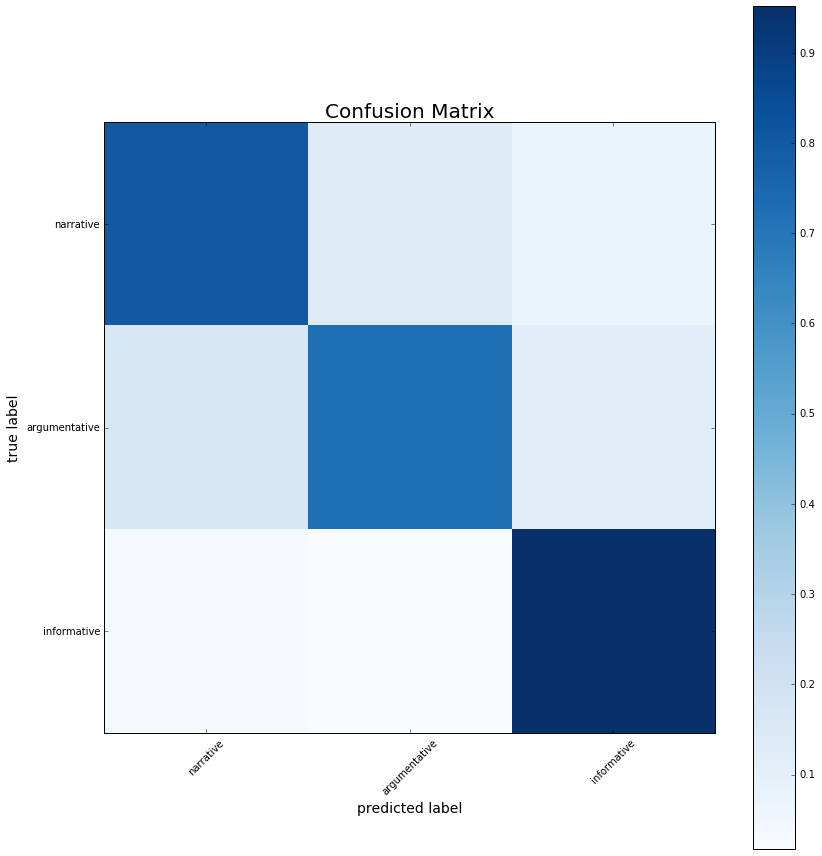

In [122]:
from sklearn import metrics
classes = ['narrative','argumentative','informative']

maxent.fit(V[rep][idx],y[idx])
pred=maxent.predict(V[rep][idx])
conf = metrics.confusion_matrix(y[idx],pred)
norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(norm_conf)

### Treekernel

In [33]:
K_t4 = pickle.load(open('../../data/test/tree_kernel_4.pkl'))
K_t5 = pickle.load(open('../../data/test/tree_kernel_5.pkl'))

<IPython.core.display.Javascript object>


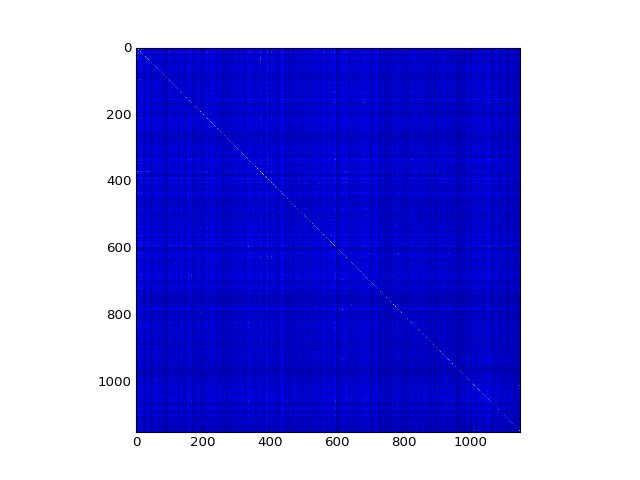

In [97]:
plt.figure()
plt.imshow(K_t5)
plt.show()

In [55]:
d = {}
svm_clf = svm.SVC(kernel="precomputed",C=0.1)
scores = cross_validation.cross_val_score(svm_clf,K_t4[idx][:,idx],y[idx],cv=5)        
d['pruning size: 4'] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
print scores.mean()

0.514087010926


In [57]:
svm_clf = svm.SVC(kernel="precomputed",C=0.01)
cv = cross_validation.ShuffleSplit(len(y[idx]), n_iter=2,test_size=0.3, random_state=0)
scores = cross_validation.cross_val_score(svm_clf,K_t5[idx][:,idx],y[idx],cv=6)

d['pruning size: 5'] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
print scores.mean()

df_tree = pd.DataFrame([d],index=['treeKernel'])
df_tree

0.526776442664


,pruning size: 4,pruning size: 5
treeKernel,0.51 (+/- 0.09),0.53 (+/- 0.08)


print ''

## Ajout de features

In [103]:
V_pos_norm = pickle.load(open('../data/pos_tags/pos_norm_vects.pkl',"r"))

In [104]:
V_pos_norm.shape

(1149, 41)

## Ajout features: svm

In [111]:
from sklearn import linear_model

representations = ['bin', 'count', 'tfid', 'norm', 'height']


V_plus = {}
for key in V.keys():
    V_plus[key] = np.hstack((V[key],c*V_pos_norm))
    #V_plus[key] = np.hstack((np.zeros((V[key].shape)),V_pos_norm))
print len(V_plus[V.keys()[0]])
print V_plus.keys()

1149
['bin', 'count', 'tfid', 'norm', 'height']


bin
count
tfid
norm
height


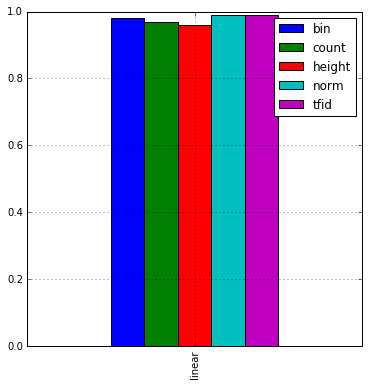

,bin,count,height,norm,tfid
linear,0.98 (+/- 0.02),0.97 (+/- 0.01),0.96 (+/- 0.03),0.99 (+/- 0.03),0.99 (+/- 0.02)


In [112]:
representations = ['bin', 'count', 'tfid', 'norm', 'height']

results = []

d = {}
for rep in representations:
    svm_clf = svm.SVC(kernel='linear')
    scores = cross_validation.cross_val_score(svm_clf,V_plus[rep][idx],y[idx],cv=5)        
    d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
    print rep
        
results.append(d)
svm_res = pd.DataFrame(results,index=['linear'])


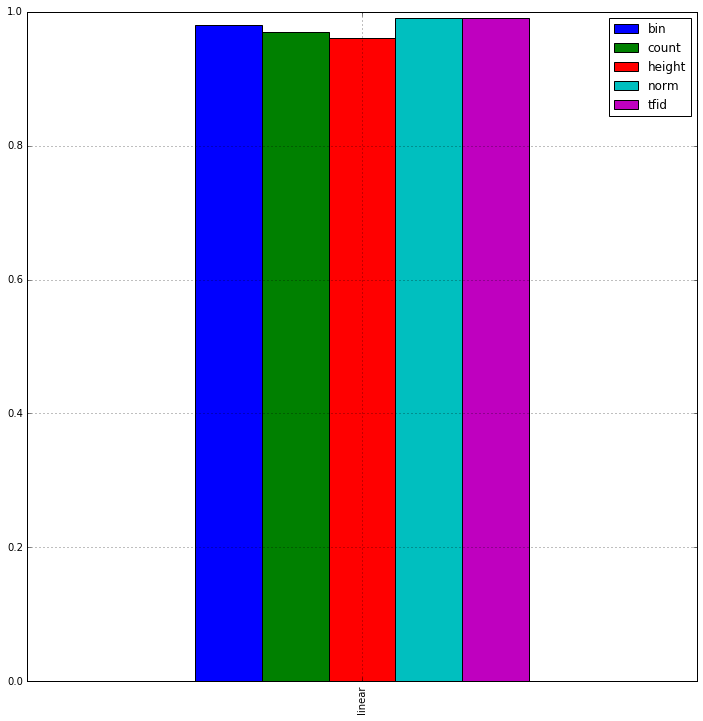

awele


,bin,count,height,norm,tfid
linear,0.98 (+/- 0.02),0.97 (+/- 0.01),0.96 (+/- 0.03),0.99 (+/- 0.03),0.99 (+/- 0.02)


In [114]:
plot_df(svm_res,figsize=12)
print 'awele'
svm_res

## Uniquement avec les pos tags

In [ ]:
results = []
d = {}
for rep in representations:
    maxentpos = linear_model.LogisticRegression()
    scores = cross_validation.cross_val_score(maxentpos,V_pos_norm[rep][idx],y[idx],cv=5)        
    d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
results.append(d)
maxent_pos = pd.DataFrame(results,index=[''])
plot_df(maxent_pos,figsize=12)
print 'ciao'
maxent_pos

## maxent

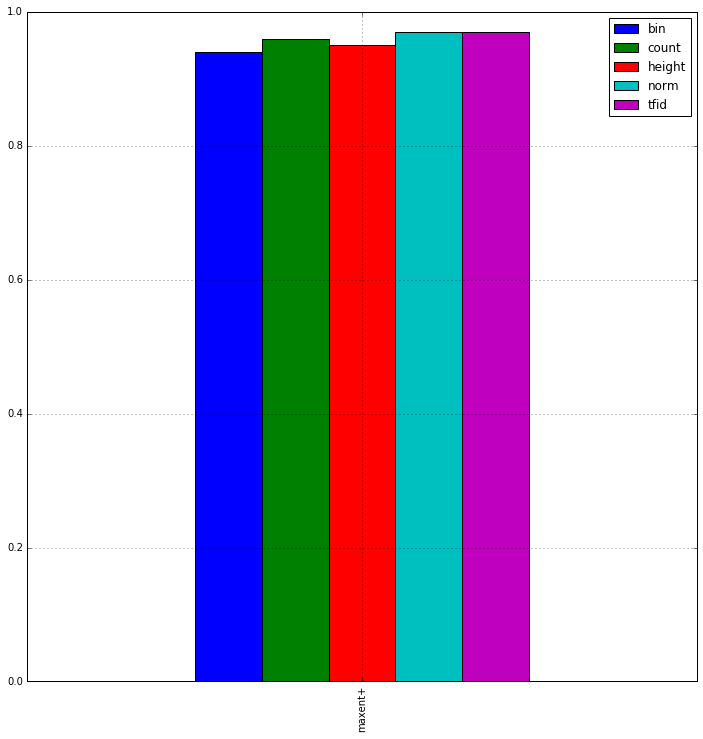

salutt


,bin,count,height,norm,tfid
maxent+,0.94 (+/- 0.04),0.96 (+/- 0.02),0.95 (+/- 0.02),0.97 (+/- 0.03),0.97 (+/- 0.03)


In [108]:
from sklearn import linear_model

representations = ['bin', 'count', 'tfid', 'norm', 'height']

for c in np.linspace(4,4,1):
    V_plus = {}
    for key in V.keys():
        V_plus[key] = np.hstack((V[key],c*V_pos_norm))
        #V_plus[key] = np.hstack((np.zeros((V[key].shape)),V_pos_norm))

    results = []
    d = {}
    for rep in representations:
        maxent = linear_model.LogisticRegression()
        #np.random.shuffle(range(len(V_plus)))
        #V_plus[rep][]
        #cv = cross_validation.ShuffleSplit(len(y[idx]), n_iter=2,test_size=0.3, random_state=0)
        scores = cross_validation.cross_val_score(maxent,V_plus[rep][idx],y[idx],cv=5)        
        d[rep] = "   %0.2f   (+/- %0.2f) " % (scores.mean(), scores.std() * 2)
    results.append(d)
    maxent_res = pd.DataFrame(results,index=['maxent+'])
plot_df(maxent_res,figsize=12)
print 'salutt'
maxent_res

### Matrice de Confusion

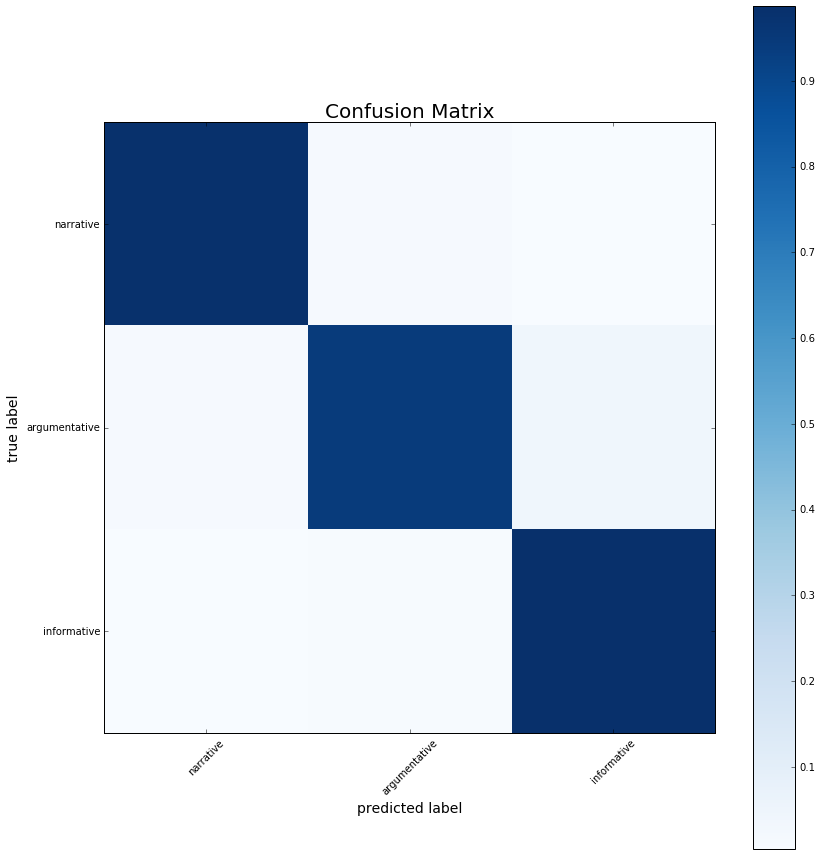

In [121]:
from sklearn import metrics
classes = ['narrative','argumentative','informative']

maxent.fit(V_plus[rep][idx],y[idx])
pred=maxent.predict(V_plus[rep][idx])
conf = metrics.confusion_matrix(y[idx],pred)

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,size=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('true label',size=14)
    plt.xlabel('predicted label',size=14)
    
norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(norm_conf)


In [118]:
V_plus['tfid'].shape

(1149, 77)

In [39]:
print np.where(X_r[:,0]<-2)
print np.where(X_r[:,1]>10)
#print np.where()
print X_r[55]
print len(X_r[775])
index = np.ones((len(X_r)),dtype=bool)
index[55]=0
index[775]=0
print len(X_r[index])


(array([55]),)
(array([775]),)
[-15.30166635   0.55110847]
2
1147


In [55]:
labels = np.array(['narrative','argumentative','informative'])
labels[y]

array(['narrative', 'narrative', 'narrative', ..., 'informative',
       'informative', 'informative'], 
      dtype='|S13')

<IPython.core.display.Javascript object>


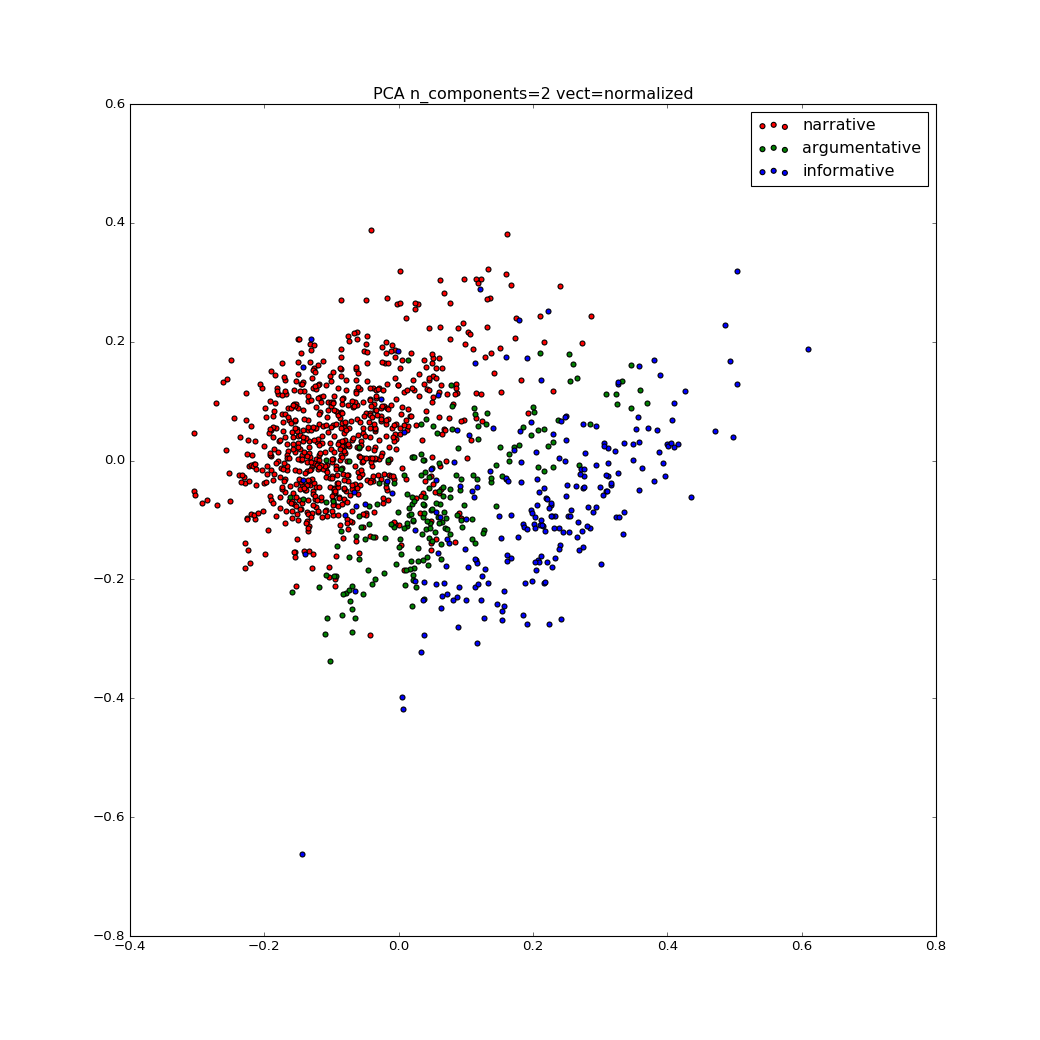

/home/emmanuel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_r = pca.fit(V_plus['norm']).transform(V_plus['norm'])

plt.figure(figsize=(13,13))
for c, i, target_name in zip("rgb", [0.,1.,2.], y):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=labels[i])
plt.legend()
plt.title('PCA n_components=2 vect=normalized')

<IPython.core.display.Javascript object>


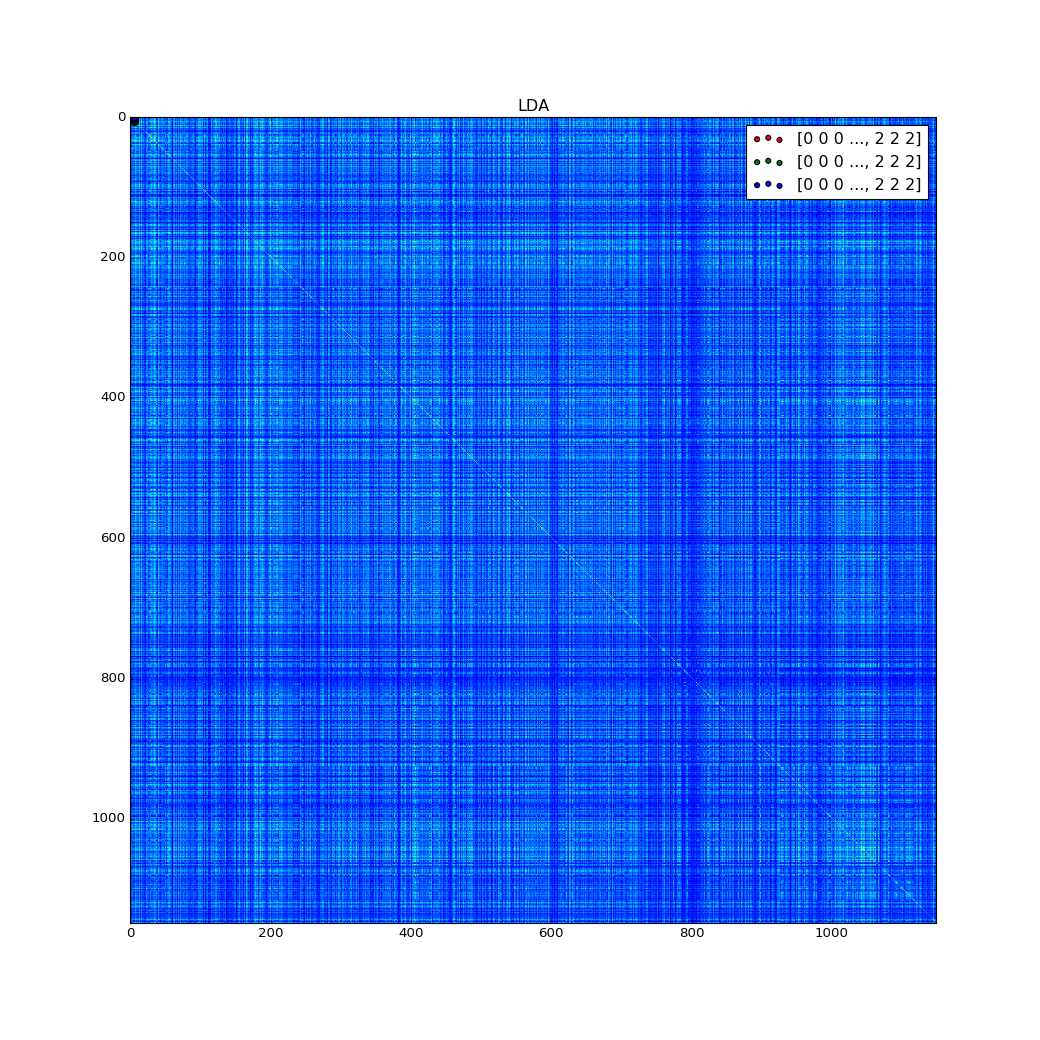

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(V_plus['tfid'],y).transform(V_plus['tfid'])
plt.figure(figsize=(13,13))
for c, i, target_name in zip("rgb", [0, 1, 2], y):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=y)
plt.legend()
plt.title('LDA')

plt.show()

<IPython.core.display.Javascript object>


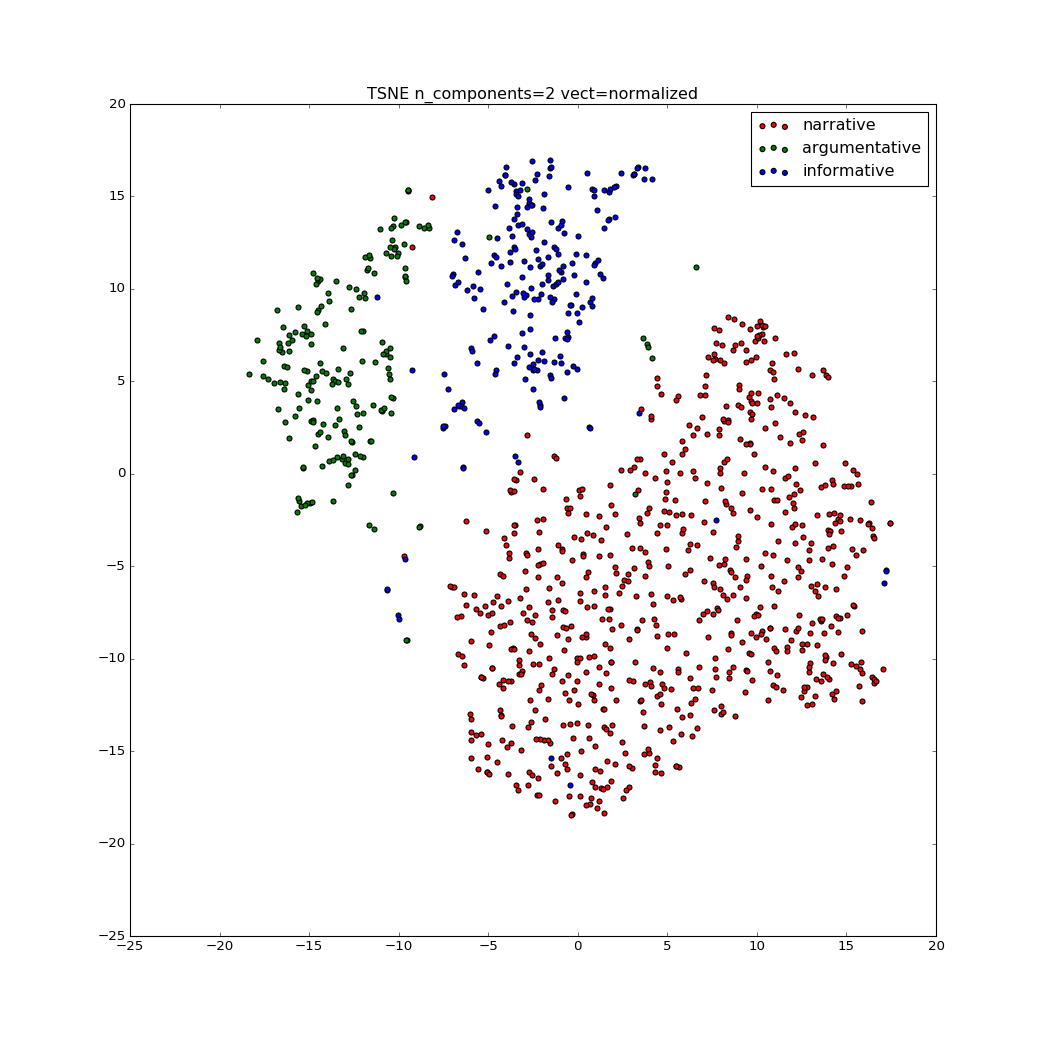

In [86]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
X_r=model.fit_transform(V_plus['norm'])

plt.figure(figsize=(13,13))
for c, i, target_name in zip("rgb", [0, 1, 2], y):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=labels[i])
plt.legend()
plt.title('TSNE n_components=2 vect=normalized')

## matrices de confusion

['rbf', 'lin', 'eucl_dist', 'cos_sim', 'mink_dist']
['bin', 'count', 'tfid', 'norm', 'height']


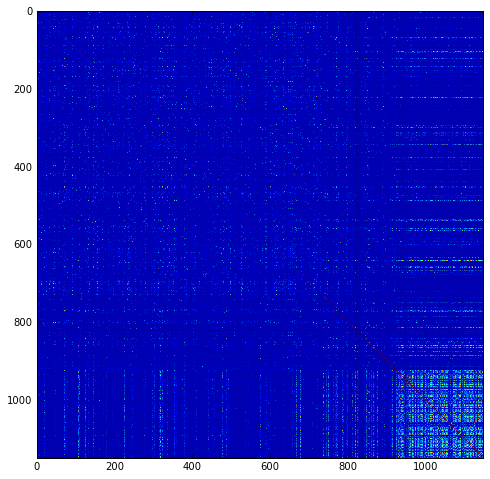

In [242]:
print vect_kernels.keys()
print vect_kernels['rbf'].keys()
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(vect_kernels['rbf']['norm']+vect_kernels['rbf']['height'])
plt.show()